# Laboratorio 3 — Programación Concurrente con Pthreads  
## Análisis de rendimiento: Cálculo de π y Secuencia de Fibonacci  
**Autor:** Emanuel Munera - Santiago Correa Castillo
**Asignatura:** Sistemas Operativos  

**Video de sustentación:**  
https://youtu.be/94Mo3K6cpWQ


# 1. Evaluación del rendimiento del cálculo de π

En esta sección se analiza el rendimiento de las implementaciones:

- `pi_s`: versión serial.
- `pi_p`: versión paralela con Pthreads.

Ambas versiones utilizan el mismo número de intervalos:  
**n = 2 000 000 000**.

## 1.1 Tiempo de ejecución serial (T_s)

Tras correr con:
```./pi_s```

El tiempo medido fue:

T_s = 6.328475 segundos


## 1.2 Tiempo de ejecución paralelo (T_p)

Se ejecutó la versión paralela con diferentes números de hilos N:

```./pi_p 2000000000 N```


Se evaluaron los siguientes valores de N:

- 1, 2, 4, 8

A continuación se presentan los resultados.


In [6]:
import pandas as pd

# EDITA con tus tiempos reales
data = {
    "N": [1, 2, 4, 8],
    "T_p": [7.013483, 3.926089, 2.279348, 1.860957],
    "T_s": 6.417141
}

df = pd.DataFrame(data)

# Cálculo de speedup y eficiencia
df["Speedup"] = df["T_s"] / df["T_p"]
df["Eficiencia"] = df["Speedup"] / df["N"]

df


,N,T_p,T_s,Speedup,Eficiencia
0,1,7.013483,6.417141,0.914972,0.914972
1,2,3.926089,6.417141,1.634487,0.817243
2,4,2.279348,6.417141,2.815341,0.703835
3,8,1.860957,6.417141,3.448302,0.431038


## 1.3 Tabla de resultados

La tabla anterior muestra:

- **T_p(N):** tiempo paralelo usando N hilos.
- **Speedup = T_s / T_p**
- **Eficiencia = Speedup / N**

Estos valores permiten analizar cómo se comporta el paralelismo para este problema CPU-bound.


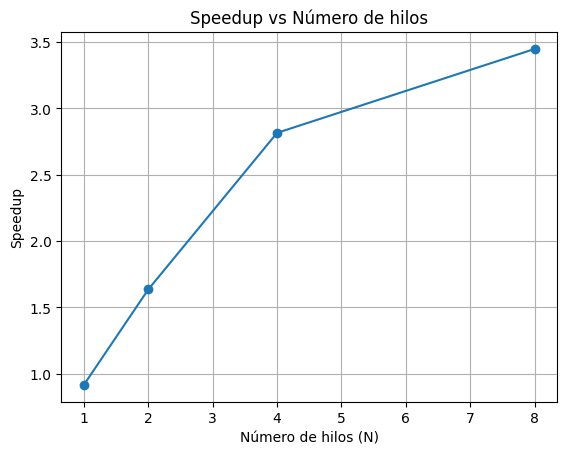

In [11]:
import matplotlib.pyplot as plt

plt.plot(df["N"], df["Speedup"], marker="o")
plt.xlabel("Número de hilos (N)")
plt.ylabel("Speedup")
plt.title("Speedup vs Número de hilos")
plt.grid(True)
plt.show()


# 2. Generación multihilo de la secuencia de Fibonacci

En esta parte se implementó un programa que:

- Reserva un arreglo compartido de tamaño N.
- Crea un único **hilo trabajador**.
- El hilo calcula la secuencia de Fibonacci completa.
- El hilo principal espera con `pthread_join`.

Este enfoque demuestra cómo los hilos pueden modificar memoria compartida de forma segura sin necesidad de sincronización adicional, siempre que no existan accesos simultáneos conflictivos.


## 2.1 Resultado de ejecución

Ejecutando:
```./fibonacci 15```


La salida fue:

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377




Saving WhatsApp Image 2025-11-26 at 18.57.06.jpeg to WhatsApp Image 2025-11-26 at 18.57.06 (2).jpeg


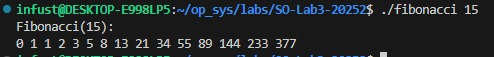

In [14]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

# To display the uploaded image
Image(list(uploaded.keys())[0])

# 2.2 Análisis del diseño

El arreglo donde se almacenan los valores de Fibonacci se reserva en el hilo principal mediante malloc, lo que asegura que su dirección de memoria sea accesible para todos los hilos del proceso. El hilo trabajador genera los valores de la serie de manera secuencial, escribiéndolos directamente en el arreglo compartido. En este caso, no es necesario utilizar mecanismos de exclusión mutua, dado que únicamente un hilo realiza escrituras y no existe acceso concurrente a la misma región de memoria.

La sincronización entre el hilo principal y el hilo trabajador se garantiza mediante la llamada pthread_join. Esta operación bloquea al hilo principal hasta que el trabajador finaliza su ejecución, asegurando que la secuencia esté completamente generada antes de proceder a imprimir los resultados. De este modo, se evita cualquier condición de carrera asociada a la lectura prematura del arreglo.